In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import torch
from torchvision import transforms
import numpy as np
from skimage import io, filters
import pandas as pd
import cv2

In [ ]:
import os
img_directory = "train_sharp/train/train_sharp/"

files = os.listdir(img_directory)

images_paths = [os.path.join(img_directory, file) for file in files]



In [ ]:
images=[]
for image_path in images_paths:
    image_files=os.listdir(image_path)
    images.extend([os.path.join( image_path,i) for i in image_files])

In [ ]:
transform=transforms.Compose([
    transforms.Resize((256,448)),
    ])
img_path=images[90]
img=Image.open(img_path)

resized_image=transform(img)

print("Original Image Shape:", img.size)

resized_image.save(img_path)

print("Resized Image Shape:", resized_image.size)

Original Image Shape: (448, 256)
Resized Image Shape: (448, 256)


In [ ]:
#Resizing all image to 256,448

for img_path in images:
    img=Image.open(img_path)
    resized_image=transform(img)
    resized_image.save(img_path)

In [ ]:
img_path=images[95]

image = cv2.imread(img_path)
cv2.imshow('Image1',image)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


cv2.imshow('Image2',rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:


output_folder_3 = "kernel_3"
output_folder_7 = "kernel_7"
output_folder_11 = "kernel_11"


data=[]
# for filename in os.listdir(input_folder):
for img in images:

    filename = os.path.splitext(os.path.basename(img))[0]

    folder_path = os.path.splitext(img)[0]
    # folder_path = img
    parts = folder_path.split("/")

    filename = parts[-3]+'-'+parts[-1]


    image = cv2.imread(img)

    output_path_3 = os.path.join(output_folder_3, f"{filename}.png")
    # Apply Gaussian blur with kernel size 3 and sigma 1
    blurred_image_3 = cv2.GaussianBlur(image, (3, 3), 0.6)
    cv2.imwrite(output_path_3, blurred_image_3)
    data.append({"filtered_image":output_path_3, "sharp_image":img})


    output_path_7 = os.path.join(output_folder_7, f"{filename}.png")
    # Apply Gaussian blur with kernel size 7 and sigma 1
    blurred_image_7 = cv2.GaussianBlur(image, (7, 7), 1)
    cv2.imwrite(output_path_7, blurred_image_7)
    data.append({"filtered_image":output_path_7, "sharp_image":img})


    output_path_11 = os.path.join(output_folder_11, f"{filename}.png")
    # Apply Gaussian blur with kernel size 11 and sigma 1.6
    blurred_image_11 = cv2.GaussianBlur(image, (11, 11), 1.6)
    cv2.imwrite(output_path_11, blurred_image_11)
    data.append({"filtered_image":output_path_11, "sharp_image":img})

df=pd.DataFrame(data)
# print(df)
df.to_csv("paths.csv", index=False)

           filtered_image                                      sharp_image
0   kernel_3\00000000.png  train_sharp/train/train_sharp/000//00000000.png
1   kernel_7\00000000.png  train_sharp/train/train_sharp/000//00000000.png
2  kernel_11\00000000.png  train_sharp/train/train_sharp/000//00000000.png


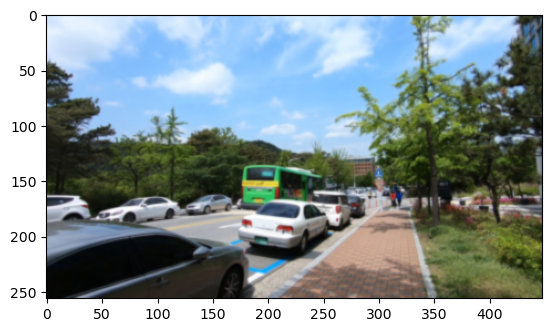

(256, 448, 3)


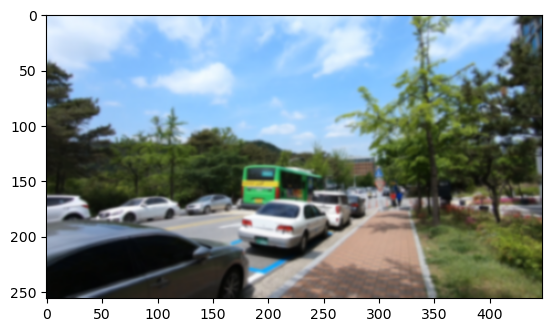

(256, 448, 3)


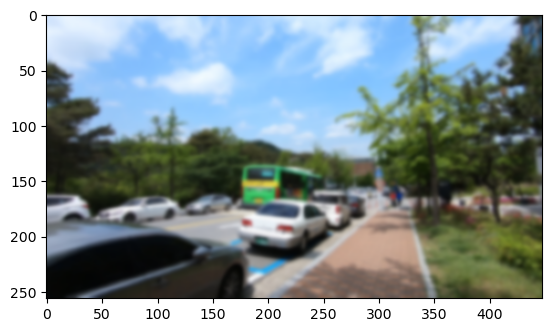

(256, 448, 3)


In [ ]:

# Load the image
for i in range(3):
    img_path=df['filtered_image'][i]
    df_img = io.imread(img_path)
    plt.imshow(df_img)
    plt.show()
    print(df_img.shape)
# print(img_path)

In [ ]:
dataframe = pd.read_csv("paths.csv")
dataframe = dataframe.sample(frac=1).reset_index(drop=True)


In [ ]:
dataframe.iloc[0,0]

'kernel_7\\011-00000022.png'

In [ ]:
img_in=dataframe.iloc[0,1]